In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Understand Measurements

- Measurement is the wave output of a Spikerbox that records the electrical signal from a specific plant
- id_measurement is a unique identifier of the signa.
- The data is composed of 625 measurements

## Data import

In [9]:
measurements_file= r"../../data/raw/measurements_info.csv"

In [13]:
df= pd.read_csv(measurements_file,index_col='id_measurement')

In [14]:
df.head()

,id_performance,datetime,plant,generation,wav_file,num_eurythmy
id_measurement,,,,,,
1,1,2023-04-29,salad,1,#1_#1_230429_SE1_M1_BYB_Recording_2023-04-29_1...,1
2,1,2023-04-29,salad,1,#1_#2_230429_SE1_M1_BYB_Recording_2023-04-29_1...,1
3,1,2023-04-29,salad,1,#1_#3_230429_SE1_M1_BYB_Recording_2023-04-29_1...,1
4,1,2023-04-29,salad,2,#1_#4_230429_SK2_M1_BYB_Recording_2023-04-29_1...,0
5,1,2023-04-29,salad,2,#1_#5_230429_SK2_M2_BYB_Recording_2023-04-29_1...,0


In [15]:
df.shape

(625, 6)

## Data Comprehension

### Date

In [22]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')

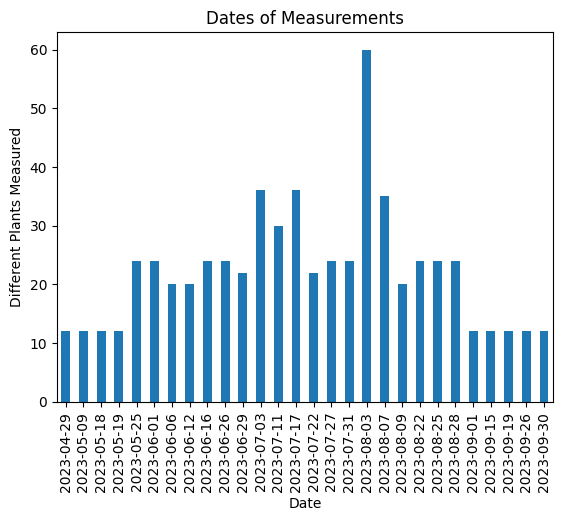

In [42]:
# This groups by date (ignoring time) and counts the occurrences
date_counts = df['datetime'].dt.date.value_counts()
date_counts = date_counts.sort_index()

# Plotting
date_counts.plot(kind='bar')  # or 'hist' for a true histogram representation
plt.title('Dates of Measurements')
plt.xlabel('Date')
plt.ylabel('Different Plants Measured')
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.show()

### Plants

This attribute represents the different plant species that were analyzed

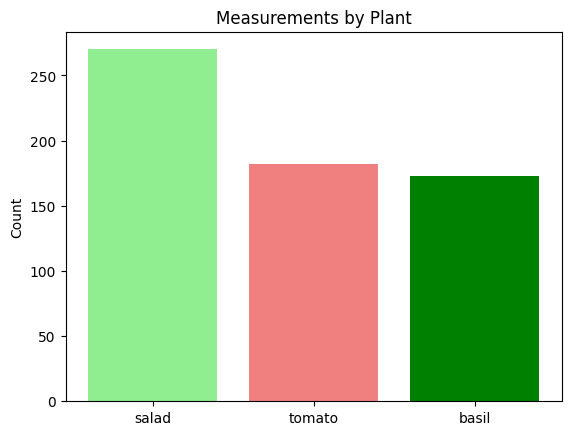

In [56]:
plant_counts = df['plant'].value_counts()
colors = {'salad': 'lightgreen', 'tomato': 'lightcoral', 'basil': 'green'}
bar_colors = [colors[plant] if plant in colors else 'gray' for plant in plant_counts.index]
plt.bar(plant_counts.index, plant_counts.values, color=bar_colors)
plt.title('Measurements by Plant')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

### Generations

This feature represents the specific group of plants within the crop field that were measured

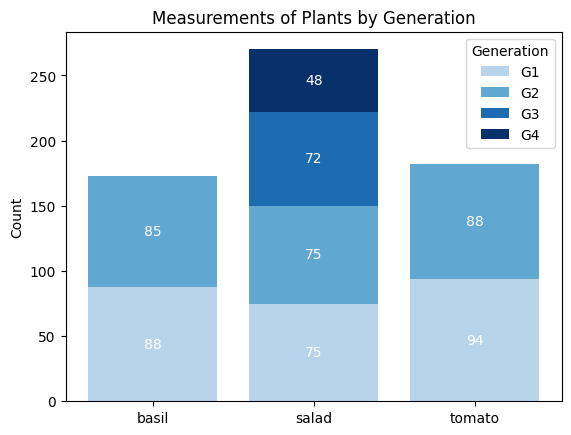

In [74]:
grouped_counts = df.groupby(['plant', 'generation']).size().unstack(fill_value=0)

# Assuming generations are numbered sequentially
num_generations = len(grouped_counts.columns)
blues = plt.cm.Blues(np.linspace(0.3, 1, num_generations))  # Generating shades of blue

fig, ax = plt.subplots()

# Plot stacked bars
bottom = np.zeros(len(grouped_counts))
for i, generation in enumerate(grouped_counts.columns):
    ax.bar(grouped_counts.index, grouped_counts[generation], bottom=bottom, label=f'G{generation}', color=blues[i])
    
    # Add text annotation for each segment
    for j, value in enumerate(grouped_counts[generation]):
        if value > 0:  # Only annotate non-zero segments
            ax.text(j, bottom[j] + value/2, str(value), ha='center', va='center', color='white')

    bottom += grouped_counts[generation]
    
plt.title('Measurements of Plants by Generation')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='Generation')
plt.show()

### Number of Eurythmy

This attribute represents the number of times the plant has received eurytmy at the time of the measurement
- 0: the plant never recieved eurythmy
- 1: that measurement was the first time it recieved eurythmy
- 2: that measurement was the second time it recieved eurythmy (the first it recieved eurythmy was other day)

  ...

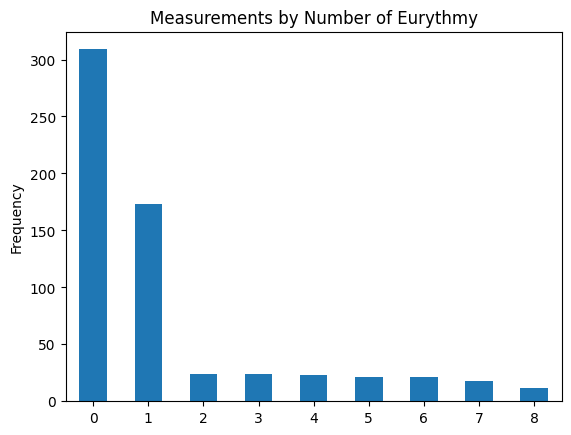

In [79]:
eurythmy_counts = df['num_eurythmy'].value_counts()
eurythmy_counts = eurythmy_counts.sort_index()

# Plotting
eurythmy_counts.plot(kind='bar')  # Use 'hist' for a histogram
plt.title('Measurements by Number of Eurythmy')
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate the x-axis labels for readability
plt.show()